In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/valid'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 17898 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4660 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=72,
  validation_steps=50
)

Epoch 1/10
72/72 [==============================] - 520s 7s/step - loss: 8.3158 - accuracy: 0.4349 - val_loss: 3.0661 - val_accuracy: 0.5788
Epoch 2/10
72/72 [==============================] - 451s 6s/step - loss: 3.7777 - accuracy: 0.5738 - val_loss: 7.1231 - val_accuracy: 0.5375
Epoch 3/10
72/72 [==============================] - 357s 5s/step - loss: 4.9858 - accuracy: 0.6163 - val_loss: 5.0306 - val_accuracy: 0.5962
Epoch 4/10
72/72 [==============================] - 326s 5s/step - loss: 3.4833 - accuracy: 0.6545 - val_loss: 2.8780 - val_accuracy: 0.6837
Epoch 5/10
72/72 [==============================] - 321s 4s/step - loss: 3.5399 - accuracy: 0.6753 - val_loss: 2.9595 - val_accuracy: 0.7125
Epoch 6/10
72/72 [==============================] - 351s 5s/step - loss: 3.2074 - accuracy: 0.7257 - val_loss: 2.8907 - val_accuracy: 0.7000
Epoch 7/10
72/72 [==============================] - 337s 5s/step - loss: 3.4744 - accuracy: 0.7092 - val_loss: 4.9660 - val_accuracy: 0.6225
Epoch 8/10
72

In [ ]:
import matplotlib.pyplot as plt

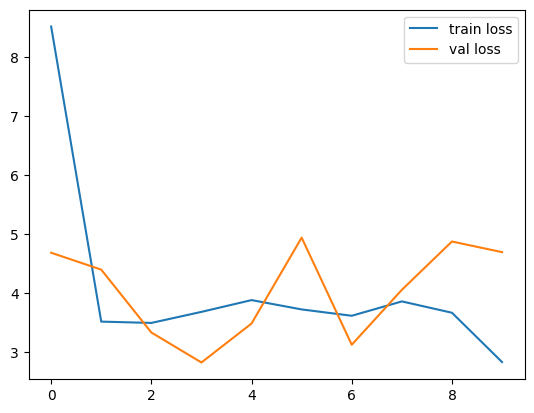

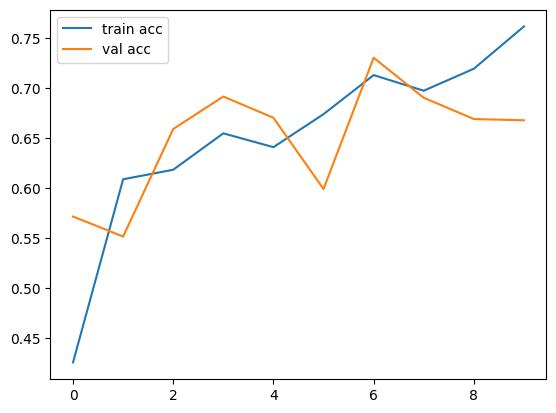

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
#model.save('model.keras')

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model_inception.h5')

OSError: No file or directory found at model_inception.h5